# Лабораторная работа №2
**Дисциплина:** Статистика и машинное обучение

**Выполнил:** Потёмин Владислав Дмитриевич


## Задача 1

**Условие.**
Случайная величина $\xi$ имеет плотность
$$
f_\xi(x) = \theta^2 x e^{-\theta x}, \quad x \ge 0,
$$
где $\theta \in \{0.5,\; 2,\; 8\}$.

Нужно:
1. (a) аналитически найти $E\xi$, $\operatorname{Var}\xi$ и $E\xi^2$;
2. (b) для $k \in \{2^4,2^5,\dots,2^{15}\}$ построить выборки и посчитать оценки:
   выборочного среднего, выборочной дисперсии и квадрата математического ожидания $(E\xi)^2$.

Плотность выше — это гамма-распределение с параметрами формы $k=2$ и интенсивностью $\lambda=\theta$.

Для $\Gamma(k,\lambda)$:
$$
E\xi = \frac{k}{\lambda},\qquad
\operatorname{Var}\xi = \frac{k}{\lambda^2},\qquad
E\xi^2 = \frac{k(k+1)}{\lambda^2}.
$$

Подставляем $k=2$, $\lambda=\theta$:
$$
E\xi = \frac{2}{\theta},\qquad
\operatorname{Var}\xi = \frac{2}{\theta^2},\qquad
E\xi^2 = \frac{6}{\theta^2},\qquad
(E\xi)^2 = \frac{4}{\theta^2}.
$$

Для конкретных значений параметра:

- при $\theta = 0.5$:
  $$
  E\xi = 4,\quad
  \operatorname{Var}\xi = 8,\quad
  E\xi^2 = 24,\quad
  (E\xi)^2 = 16;
  $$

- при $\theta = 2$:
  $$
  E\xi = 1,\quad
  \operatorname{Var}\xi = \frac12,\quad
  E\xi^2 = \frac32,\quad
  (E\xi)^2 = 1;
  $$

- при $\theta = 8$:
  $$
  E\xi = \frac14,\quad
  \operatorname{Var}\xi = \frac{1}{32},\quad
  E\xi^2 = \frac{3}{32},\quad
  (E\xi)^2 = \frac{1}{16}.
  $$


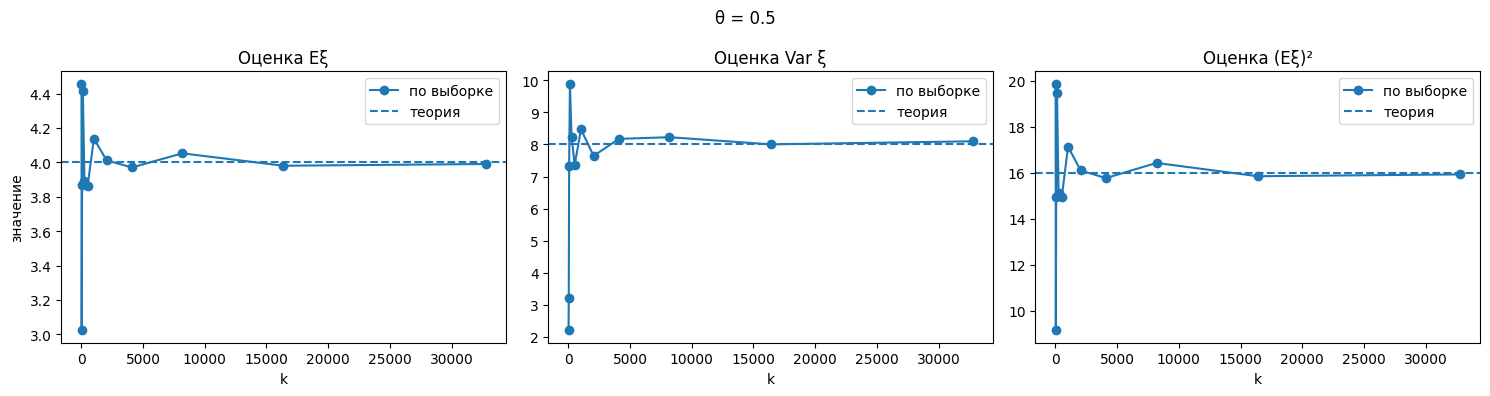

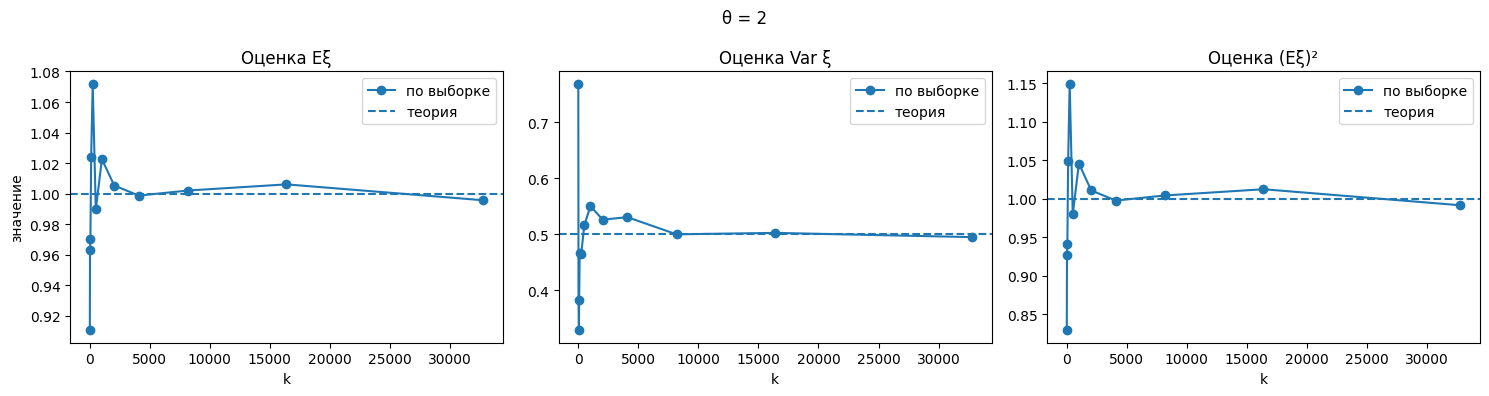

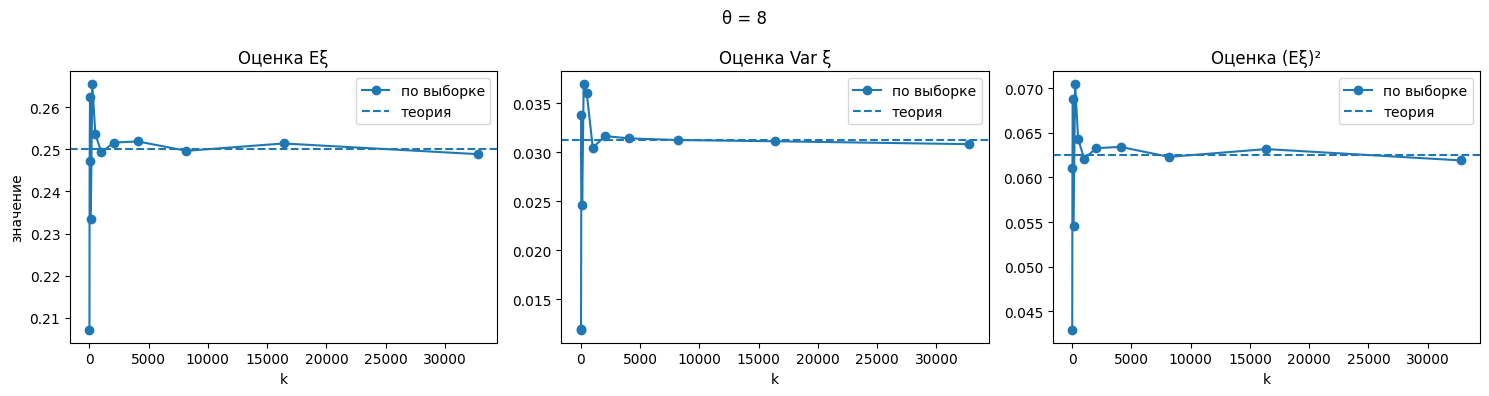

In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

thetas = [0.5, 2, 8]
ks = 2 ** np.arange(4, 16)

rng = np.random.default_rng(42)

def simulate_for_theta(theta, ks, rng):
    means = []
    vars_ = []
    mean_squares = []

    for k in ks:
        sample = rng.gamma(shape=2, scale=1/theta, size=k)

        m = sample.mean()
        v = sample.var(ddof=1)
        means.append(m)
        vars_.append(v)
        mean_squares.append(m ** 2)

    return np.array(means), np.array(vars_), np.array(mean_squares)


for theta in thetas:
    mu = 2 / theta
    var_theor = 2 / theta**2
    mu_sq_theor = mu**2

    means, vars_, mean_squares = simulate_for_theta(theta, ks, rng)

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    fig.suptitle(f"θ = {theta}")

    axes[0].plot(ks, means, marker="o")
    axes[0].axhline(mu, linestyle="--")
    axes[0].set_title("Оценка Eξ")
    axes[0].set_xlabel("k")
    axes[0].set_ylabel("значение")
    axes[0].legend(["по выборке", "теория"])

    axes[1].plot(ks, vars_, marker="o")
    axes[1].axhline(var_theor, linestyle="--")
    axes[1].set_title("Оценка Var ξ")
    axes[1].set_xlabel("k")
    axes[1].legend(["по выборке", "теория"])

    axes[2].plot(ks, mean_squares, marker="o")
    axes[2].axhline(mu_sq_theor, linestyle="--")
    axes[2].set_title("Оценка (Eξ)²")
    axes[2].set_xlabel("k")
    axes[2].legend(["по выборке", "теория"])

    plt.tight_layout()
    plt.show()


### Задача 2

**Условие.**
Дана плотность
$$
f_{\lambda,a}(x) =
\begin{cases}
\lambda e^{-\lambda(x-a)}, & x \ge a,\\
0, & x < a,
\end{cases}
$$
где $(\lambda, a) = (2,2)$.

Нужно:

1. (a) Аналитически найти моду, математическое ожидание и медиану.
2. (b) Создать две выборки: большую (10000 наблюдений) и маленькую (20 наблюдений) и построить оценки моды, матожидания и медианы.
3. (c) Для каждой выборки построить:
   * гистограмму и на ней три вертикальные линии оценок,
   * график плотности с теоретическими значениями моды, матожидания и медианы.
4. (d) Поиграть с размером выборки и посмотреть, как ведут себя оценки (особенно медиана).

Распределение $f_{\lambda,a}$ — это экспоненциальное $Exp(\lambda)$, сдвинутое на $a$ вправо:
$$
X = a + Y,\quad Y \sim Exp(\lambda).
$$

Для обычного экспоненциального $Exp(\lambda)$:

- мода: $0$ (максимум плотности в начале),
- математическое ожидание: $E Y = \dfrac{1}{\lambda}$,
- медиана: $m_Y = \dfrac{\ln 2}{\lambda}$ (из $P(Y \le m_Y)=0{,}5$).

Для сдвинутого распределения $X = a + Y$ просто добавляем $a$:

- мода:
  $$
  \operatorname{mode}(X) = a;
  $$
- математическое ожидание:
  $$
  E X = a + \frac{1}{\lambda};
  $$
- медиана:
  $$
  m_X = a + \frac{\ln 2}{\lambda}.
  $$

При $(\lambda,a) = (2,2)$ получаем:

- мода:
  $$
  \operatorname{mode}(X) = 2;
  $$
- математическое ожидание:
  $$
  E X = 2 + \frac{1}{2} = 2{,}5;
  $$
- медиана:
  $$
  m_X = 2 + \frac{\ln 2}{2} \approx 2{,}35.
  $$


Теоретическая мода   : 2.0
Теоретическое E[X]   : 2.5
Теоретическая медиана: 2.3465735902799727

Большая выборка (n = 10000)
  мода по выборке   : 2.0896435130153432
  E[X] по выборке   : 2.498941727637147
  медиана по выборке: 2.3428141907097

Маленькая выборка (n = 20)
  мода по выборке   : 2.1439343933779194
  E[X] по выборке   : 2.341458620644453
  медиана по выборке: 2.2682374033451005


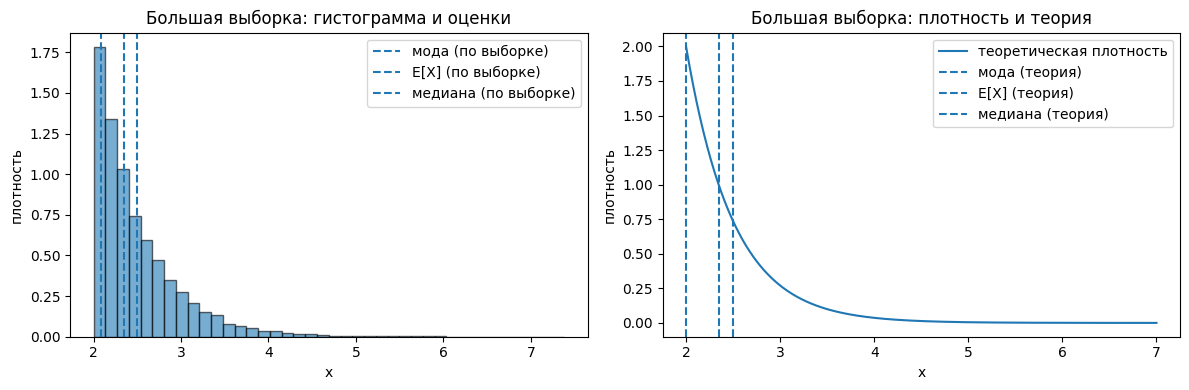

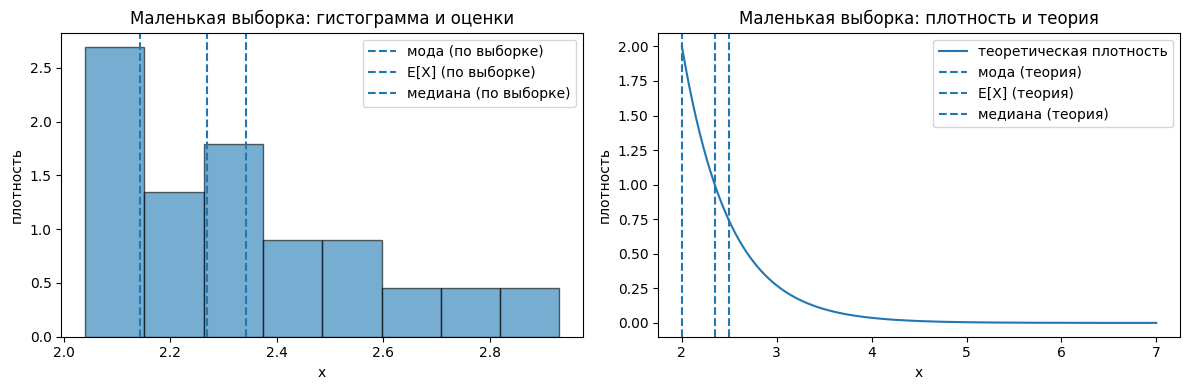

In [6]:
import numpy as np
import matplotlib.pyplot as plt

lam = 2.0
a = 2.0

mode_theor = a
mean_theor = a + 1 / lam
median_theor = a + np.log(2) / lam

print("Теоретическая мода   :", mode_theor)
print("Теоретическое E[X]   :", mean_theor)
print("Теоретическая медиана:", median_theor)

def shifted_exp_pdf(x, lam=lam, a=a):
    x = np.asarray(x)
    res = np.zeros_like(x, dtype=float)
    mask = x >= a
    res[mask] = lam * np.exp(-lam * (x[mask] - a))
    return res

def sample_mode(sample, bins=30):
    counts, edges = np.histogram(sample, bins=bins)
    idx = np.argmax(counts)
    return 0.5 * (edges[idx] + edges[idx + 1])

n_big = 10_000
n_small = 20

big_sample = a + np.random.exponential(scale=1/lam, size=n_big)
small_sample = a + np.random.exponential(scale=1/lam, size=n_small)

mode_big = sample_mode(big_sample)
mean_big = big_sample.mean()
median_big = np.median(big_sample)

mode_small = sample_mode(small_sample)
mean_small = small_sample.mean()
median_small = np.median(small_sample)

print("\nБольшая выборка (n = 10000)")
print("  мода по выборке   :", mode_big)
print("  E[X] по выборке   :", mean_big)
print("  медиана по выборке:", median_big)

print("\nМаленькая выборка (n = 20)")
print("  мода по выборке   :", mode_small)
print("  E[X] по выборке   :", mean_small)
print("  медиана по выборке:", median_small)

x_grid = np.linspace(a, a + 10/lam, 400)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].hist(big_sample, bins=40, density=True, alpha=0.6, edgecolor='black')
ax[0].axvline(mode_big,   linestyle='--', label='мода (по выборке)')
ax[0].axvline(mean_big,   linestyle='--', label='E[X] (по выборке)')
ax[0].axvline(median_big, linestyle='--', label='медиана (по выборке)')
ax[0].set_title('Большая выборка: гистограмма и оценки')
ax[0].set_xlabel('x')
ax[0].set_ylabel('плотность')
ax[0].legend()

ax[1].plot(x_grid, shifted_exp_pdf(x_grid), label='теоретическая плотность')
ax[1].axvline(mode_theor,   linestyle='--', label='мода (теория)')
ax[1].axvline(mean_theor,   linestyle='--', label='E[X] (теория)')
ax[1].axvline(median_theor, linestyle='--', label='медиана (теория)')
ax[1].set_title('Большая выборка: плотность и теория')
ax[1].set_xlabel('x')
ax[1].set_ylabel('плотность')
ax[1].legend()

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].hist(small_sample, bins=8, density=True, alpha=0.6, edgecolor='black')
ax[0].axvline(mode_small,   linestyle='--', label='мода (по выборке)')
ax[0].axvline(mean_small,   linestyle='--', label='E[X] (по выборке)')
ax[0].axvline(median_small, linestyle='--', label='медиана (по выборке)')
ax[0].set_title('Маленькая выборка: гистограмма и оценки')
ax[0].set_xlabel('x')
ax[0].set_ylabel('плотность')
ax[0].legend()

ax[1].plot(x_grid, shifted_exp_pdf(x_grid), label='теоретическая плотность')
ax[1].axvline(mode_theor,   linestyle='--', label='мода (теория)')
ax[1].axvline(mean_theor,   linestyle='--', label='E[X] (теория)')
ax[1].axvline(median_theor, linestyle='--', label='медиана (теория)')
ax[1].set_title('Маленькая выборка: плотность и теория')
ax[1].set_xlabel('x')
ax[1].set_ylabel('плотность')
ax[1].legend()

plt.tight_layout()
plt.show()


### Задача 3 (1.2)
**Условие.**
Совместное распределение случайных величин $\xi$ и $\eta$ задано таблицей
(строки — значения $\xi$, столбцы — значения $\eta$):

$$
\begin{array}{c|cccc}
\xi \backslash \eta & 1 & 2 & 3 & \dots \\
\hline
-1 & \dfrac{2}{5}\cdot\dfrac{1}{2} & \dfrac{2}{5}\cdot\dfrac{1}{2^2} & \dfrac{2}{5}\cdot\dfrac{1}{2^3} & \dots \\
0  & \dfrac{1}{5}\cdot\dfrac{1}{2} & \dfrac{1}{5}\cdot\dfrac{1}{2^2} & \dfrac{1}{5}\cdot\dfrac{1}{2^3} & \dots \\
1  & \dfrac{2}{5}\cdot\dfrac{1}{2} & \dfrac{2}{5}\cdot\dfrac{1}{2^2} & \dfrac{2}{5}\cdot\dfrac{1}{2^3} & \dots
\end{array}
$$

где $\eta$ принимает значения $1,2,3,\dots$ (натуральные числа).

Нужно:

1. Найти **корреляционную матрицу** вектора $(\xi,\eta)$ аналитически.
2. Приближённо оценить её с помощью моделирования (генерации выборки).

#### Аналитическое решение

Из таблицы видно, что для любого $n \ge 1$:

$$
\begin{aligned}
P(\xi=-1,\eta=n) &= \frac{2}{5}\cdot\frac{1}{2^n},\\
P(\xi=0,\eta=n)  &= \frac{1}{5}\cdot\frac{1}{2^n},\\
P(\xi=1,\eta=n)  &= \frac{2}{5}\cdot\frac{1}{2^n}.
\end{aligned}
$$

**Маргинальные распределения.**

Суммируем по $n$:

$$
P(\xi=-1)=\frac{2}{5}\sum_{n=1}^{\infty}\frac{1}{2^n}=\frac{2}{5},\quad
P(\xi=0)=\frac{1}{5},\quad
P(\xi=1)=\frac{2}{5}.
$$

Суммируем по $\xi$:

$$
P(\eta=n)=\left(\frac{2}{5}+\frac{1}{5}+\frac{2}{5}\right)\frac{1}{2^n}
=\frac{1}{2^n},\quad n=1,2,\dots
$$

Отсюда видно, что
$$
P(\xi=x,\eta=n)=P(\xi=x)\,P(\eta=n),
$$
то есть $\xi$ и $\eta$ **независимы**.

**Моменты.**

Для $\xi$:

$$
E\xi = (-1)\cdot\frac{2}{5} + 0\cdot\frac{1}{5} + 1\cdot\frac{2}{5} = 0,
$$
$$
E\xi^2 = (-1)^2\cdot\frac{2}{5} + 0^2\cdot\frac{1}{5} + 1^2\cdot\frac{2}{5}
= \frac{4}{5},
$$
$$
\operatorname{Var}(\xi)=E\xi^2-(E\xi)^2=\frac{4}{5}.
$$

Для $\eta$ имеем
$$
P(\eta=n)=\frac{1}{2^n},\quad n\ge1.
$$
Из известных рядов
$$
\sum_{n=1}^{\infty}\frac{n}{2^n}=2,\qquad
\sum_{n=1}^{\infty}\frac{n^2}{2^n}=6,
$$
поэтому
$$
E\eta=2,\quad E\eta^2=6,\quad
\operatorname{Var}(\eta)=6-2^2=2.
$$

**Ковариация и корреляция.**

Из независимости:

$$
\operatorname{Cov}(\xi,\eta)=0,
$$
$$
\rho_{\xi,\eta}=
\frac{\operatorname{Cov}(\xi,\eta)}
{\sqrt{\operatorname{Var}(\xi)\operatorname{Var}(\eta)}} = 0.
$$

**Корреляционная матрица** вектора $(\xi,\eta)$:

$$
R =
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}.
$$


In [7]:
import numpy as np

Ex = 0
Varx = 4/5
Eeta = 2
Vareta = 2

print("Аналитически:")
print("E[ξ] =", Ex, " Var[ξ] =", Varx)
print("E[η] =", Eeta, " Var[η] =", Vareta)
print("Ковариация должна быть 0, корреляция тоже 0.\n")

xi_values = np.array([-1, 0, 1])
xi_probs  = np.array([2/5, 1/5, 2/5])

p = 0.5

n = 100_000
rng = np.random.default_rng(42)

xi_sample = rng.choice(xi_values, size=n, p=xi_probs)
eta_sample = rng.geometric(p=p, size=n)

xi_mean = xi_sample.mean()
xi_var  = xi_sample.var(ddof=1)

eta_mean = eta_sample.mean()
eta_var  = eta_sample.var(ddof=1)

cov_matrix = np.cov(xi_sample, eta_sample, ddof=1)
cov_xy = cov_matrix[0, 1]

corr_matrix = np.corrcoef(xi_sample, eta_sample)
corr_xy = corr_matrix[0, 1]

print("По выборке (n =", n, "):")
print("E[ξ] ≈", xi_mean, " Var[ξ] ≈", xi_var)
print("E[η] ≈", eta_mean, " Var[η] ≈", eta_var)
print("Cov(ξ,η) ≈", cov_xy)
print("ρ_{ξ,η} ≈", corr_xy)
print("\nВыборочная корреляционная матрица:")
print(corr_matrix)


Аналитически:
E[ξ] = 0  Var[ξ] = 0.8
E[η] = 2  Var[η] = 2
Ковариация должна быть 0, корреляция тоже 0.

По выборке (n = 100000 ):
E[ξ] ≈ 0.00377  Var[ξ] ≈ 0.7993437805378054
E[η] ≈ 1.99916  Var[η] ≈ 2.0095193895938963
Cov(ξ,η) ≈ -0.0009368425684255549
ρ_{ξ,η} ≈ -0.0007391859704024801

Выборочная корреляционная матрица:
[[ 1.0000000e+00 -7.3918597e-04]
 [-7.3918597e-04  1.0000000e+00]]
